### Objective and Dataset Rationale

**Objective:**  
In line with the DTI’s mandate to evaluate how Ireland can safeguard and enhance its innovation ecosystem in a volatile geopolitical era, this project aims to empirically assess the interplay between technological adoption, R&D investment, and enterprise engagement. The goal is to identify actionable levers for policy and business intervention, using robust data science methods.

**Why these datasets?**  
Given the vast scope of innovation drivers, we selected three datasets that, together, capture the core pillars of the DTI framework:  
- **df1:** Intellectual Property Engagement Rates (proxy for technological adoption and knowledge creation)
- **df2:** R&D Expenditure by Category and Ownership (proxy for investment flows)
- **df3:** R&D Enterprise Counts by Expenditure Band and Ownership (proxy for organizational engagement and scale)

These datasets were chosen because they are the most relevant, accessible, and granular sources available for Ireland’s innovation landscape. Their integration allows us to triangulate key parameters of innovation performance, despite the inherent challenges of data heterogeneity and missingness.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
#  Load raw CSVs
df1 = pd.read_csv('CIS62.20250516213458.csv')  # IP engagement rates 
df2 = pd.read_csv('BSA02.20250516T100541.csv')  # Total R&D expenditure 
df3 = pd.read_csv('BSA22.20250516T200531.csv')  # R&D enterprise headcounts 

In [3]:
# Display head and info for df1
print("="*50)
print("df1 (CIS62.20250516213458.csv) HEAD")
print("="*50)
print(df1.head(), "\n")
print("df1 INFO")
print("="*50)
print(df1.info(), "\n\n")

df1 (CIS62.20250516213458.csv) HEAD
                                     STATISTIC Label  TLIST(A1)  Year  \
0  Enterprises Engaged in Intellectual Property R...       2014  2014   
1  Enterprises Engaged in Intellectual Property R...       2014  2014   
2  Enterprises Engaged in Intellectual Property R...       2014  2014   
3  Enterprises Engaged in Intellectual Property R...       2014  2014   
4  Enterprises Engaged in Intellectual Property R...       2014  2014   

            Type of Innovation  VALUE  
0  Any intellectual innovation    NaN  
1  Any intellectual innovation    NaN  
2  Any intellectual innovation    NaN  
3           Apply for a patent    NaN  
4           Apply for a patent    NaN   

df1 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC Label     105 non-null    object 
 1   TLIST(A1)         

In [4]:
# Display head and info for df2
print("="*50)
print("df2 (BSA02.20250516T100541.csv) HEAD")
print("="*50)
print(df2.head(), "\n")
print("df2 INFO")
print("="*50)
print(df2.info(), "\n\n")

df2 (BSA02.20250516T100541.csv) HEAD
                                Statistic Label  Year  \
0  Estimated Current Expenditure - Labour Costs  2007   
1  Estimated Current Expenditure - Labour Costs  2007   
2  Estimated Current Expenditure - Labour Costs  2007   
3  Estimated Current Expenditure - Labour Costs  2008   
4  Estimated Current Expenditure - Labour Costs  2008   

         Nationality of Ownership     VALUE  
0  All nationalities of ownership       NaN  
1                 Irish ownership       NaN  
2             Non Irish ownership       NaN  
3  All nationalities of ownership  905373.0  
4                 Irish ownership  308698.0   

df2 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1080 non-null   object 
 1   Year                      1080 non-null   int64  
 2   Na

In [5]:
# Display head and info for df3
print("="*50)
print("df3 (BSA22.20250516T200531.csv) HEAD")
print("="*50)
print(df3.head(), "\n")
print("df3 INFO")
print("="*50)
print(df3.info())

df3 (BSA22.20250516T200531.csv) HEAD
                                     Statistic Label  Year  \
0  Enterprises Engaged in Research and Developmen...  2007   
1  Enterprises Engaged in Research and Developmen...  2007   
2  Enterprises Engaged in Research and Developmen...  2007   
3  Enterprises Engaged in Research and Developmen...  2007   
4  Enterprises Engaged in Research and Developmen...  2007   

         Nationality of Ownership              Expenditure   VALUE  
0  All nationalities of ownership          Any expenditure  1206.0  
1  All nationalities of ownership             €0 - €99,999   419.0  
2  All nationalities of ownership      €100,000 - €499,999   398.0  
3  All nationalities of ownership    €500,000 - €1,999,999   226.0  
4  All nationalities of ownership  €2,000,000 - €4,999,999    90.0   

df3 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  -

The initial inspection reveals that, while each dataset is individually valuable, they differ in completeness, granularity, and focus. Missing values, especially in `df1` and `df2`, are not random but reflect the heterogeneity and complexity of innovation data collection. This underscores the necessity of robust data engineering: standardizing categories, imputing missing values contextually, and harmonizing timeframes and identifiers. Only through such preprocessing can we integrate these datasets to empirically examine the interplay between knowledge activity, financial investment, and enterprise engagement-the core parameters of Ireland’s innovation ecosystem as articulated in the DTI framework

## Data Preparation:

- Standardize column names for consistency.
- Map categorical variables to interpretable codes.
- Impute missing values contextually (0 for absence, mean for expenditures).
- Retain only relevant columns for analysis.

In [23]:
for df in [df1, df2, df3]:
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [59]:
# After loading, before any other operation
for df in [df1, df2, df3]:
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
# Remove redundant columns
if 'tlist(a1)' in df1.columns and 'year' in df1.columns:
    df1.drop(columns=['tlist(a1)'], inplace=True)

In [24]:
if 'type_of_innovation' in df1.columns:
    df1['is_patent'] = df1['type_of_innovation'].str.lower().str.contains('patent').astype(int)

In [25]:
patent_by_year = df1.groupby('year')['is_patent'].max().reset_index()

In [26]:
df2['stat_label_code'] = df2['statistic_label'].astype('category').cat.codes
df2['ownership_code'] = df2['nationality_of_ownership'].astype('category').cat.codes

In [60]:
# Save mapping for interpretation
stat_label_mapping = dict(enumerate(df2['statistic_label'].astype('category').cat.categories))
ownership_mapping = dict(enumerate(df2['nationality_of_ownership'].astype('category').cat.categories))
# Check for NaNs
assert not df2['stat_label_code'].isnull().any(), "Encoding error: NaNs found in stat_label_code"
assert not df2['ownership_code'].isnull().any(), "Encoding error: NaNs found in ownership_code"

In [27]:
df1['is patent'] = (df1['type_of_innovation'].str.lower().str.contains('patent')).astype(int)

In [61]:
# Remove duplicate column if exists
if 'is patent' in df1.columns:
    df1.drop(columns=['is patent'], inplace=True)

In [62]:
if 'expenditure_eur' in df2.columns:
    df2['expenditure_eur'] = df2.groupby(['stat_label_code', 'ownership_code'])['value'].transform(lambda x: x.fillna(x.median()))

In [32]:
df2_clean = df2[['year', 'stat_label_code', 'ownership_code', 'expenditure_eur']]

In [38]:
# Map Statistic Label to codes (by type of expenditure)
stat_label_map = {
    "Estimated Current Expenditure - Labour Costs": 0,
    "Estimated Current Expenditure - Other Current Costs": 1,
    "Estimated Total Current Expenditure": 2,
    "Estimated Capital Expenditure - Land and Buildings": 3,
    "Estimated Capital Expenditure- Payments made for licences to use intellectual products": 4,
    "Estimated Capital Expenditure - Instruments and Equipment (excluding software)": 5,
    "Estimated Capital Expenditure - Software purchased wholly for Research and Development purposes": 6,
    "Estimated Capital Expenditure - Software development by company in-house and used in-house": 7,
    "Estimated Total Capital Expenditure": 8,
    "Estimated Total Research and Development Expenditure": 9,
    "Actual Current Expenditure - Labour Costs": 10,
    "Actual Current Expenditure - Other Current Costs": 11,
    "Actual Total Current Expenditure": 12,
    "Actual Capital Expenditure - Land and Buildings": 13,
    "Actual Capital Expenditure- Payments made for licences to use intellectual products": 14,
    "Actual Capital Expenditure - Instruments and Equipment (excluding software)": 15,
    "Actual Capital Expenditure - Software purchased wholly for Research and Development purposes": 16,
    "Actual Capital Expenditure - Software development by company in-house and used in-house": 17,
    "Actual Total Capital Expenditure": 18,
    "Actual Total Research and Development Expenditure": 19
}
df2['stat_label_code'] = df2['statistic_label'].map(stat_label_map)

# Map Nationality of Ownership
ownership_map = {
    "Non Irish ownership": 0,
    "Irish ownership": 1,
    "All nationalities of ownership": 2
}
df2['ownership_code'] = df2['nationality_of_ownership'].map(ownership_map)

# Define the list of code columns you want to clean
code_cols = ['ip_activity_code', 'stat_label_code', 'ownership_code', 'expenditure_code']

Data Merging

The cleaned datasets are merged on shared keys (year, stat_label_code, ownership_code, expenditure_code) to create a unified DataFrame (`df`). Only rows with at least one main value present are retained.


In [42]:
# Merge df1 and df2 on year (outer to preserve all info)
df = pd.merge(df1, df2, on='year', how='outer')

# Merge with df3 on year, stat_label_code, ownership_code, and expenditure_code if present
merge_cols = ['year']
if 'stat_label_code' in df.columns and 'stat_label_code' in df3.columns:
    merge_cols.append('stat_label_code')
if 'ownership_code' in df.columns and 'ownership_code' in df3.columns:
    merge_cols.append('ownership_code')
if 'expenditure_code' in df3.columns and 'expenditure_code' in df.columns:
    merge_cols.append('expenditure_code')

df = pd.merge(df, df3, on=merge_cols, how='outer')

In [48]:
#  For each value column, fill missing with 0 if it makes sense (e.g., engagement_rate_pct),
# or with the median/mean of the group if it's an expenditure or metric value.
if 'engagement_rate_pct' in df.columns:
    df['engagement_rate_pct'] = df['engagement_rate_pct'].fillna(0)

if 'expenditure_eur' in df.columns:
    df['expenditure_eur'] = df.groupby(['stat_label_code', 'ownership_code'])['expenditure_eur'].transform(lambda x: x.fillna(x.mean()))

if 'metric_value' in df.columns:
    df['metric_value'] = df.groupby(['stat_label_code', 'expenditure_code', 'ownership_code'])['metric_value'].transform(lambda x: x.fillna(x.mean()))

#  For code columns, fill missing with a placeholder (e.g., -1) or the most frequent value if appropriate
code_cols = ['ip_activity_code', 'stat_label_code', 'ownership_code', 'expenditure_code']
for col in code_cols:
    if col in df.columns:
        df[col] = df[col].fillna(-1).astype(int)

In [53]:
# For each value column, fill missing with 0 if it makes sense (e.g., engagement_rate_pct),
# or with the median/mean of the group if it's an expenditure or metric value.
if 'engagement_rate_pct' in df.columns:
    df['engagement_rate_pct'] = df['engagement_rate_pct'].fillna(0)

if 'expenditure_eur' in df.columns:
    df['expenditure_eur'] = df.groupby(['stat_label_code', 'ownership_code'])['expenditure_eur'].transform(lambda x: x.fillna(x.mean()))

if 'metric_value' in df.columns:
    df['metric_value'] = df.groupby(['stat_label_code', 'expenditure_code', 'ownership_code'])['metric_value'].transform(lambda x: x.fillna(x.mean()))

### Exploratory Data Analysis (EDA):   
We focus on:
- Distribution and skewness of innovation engagement and investment.
- Temporal trends in R&D expenditure and enterprise activity.
- Relationships between ownership, expenditure band, and innovation outcomes.

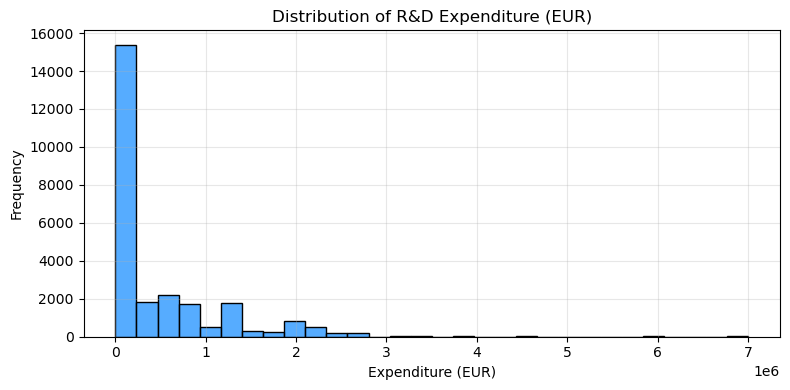

In [54]:
plt.figure(figsize=(8, 4))
sns.histplot(df['expenditure_eur'], bins=30, color='dodgerblue', edgecolor='black')
plt.title("Distribution of R&D Expenditure (EUR)")
plt.xlabel("Expenditure (EUR)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Check columns and select features
print(df_cleaned.columns.tolist())
features = [
    'engagement_rate_pct', 'expenditure_eur', 'metric_value',
    'Type_of_Innovation_code', 'Statistic_Label_code',
    'Nationality_of_Ownership_code', 'Expenditure_code'
]
features = [col for col in features if col in df_cleaned.columns]

In [ ]:
#  Prepare data for PCA
X = df_cleaned[features].values

In [ ]:
# 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply PCA
pca = PCA(n_components=min(len(features), 10))
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Scree plot
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='dodgerblue')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print("Explained variance by component:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_cleaned['year'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='year')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Use first 3 PCs as features
X_ml = X_pca[:, :3]
# y = your target variable

In [ ]:
pc_df = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(len(features))])
print(pc_df)

### PCA Interpretation

Principal Component Analysis (PCA) is employed as a dimensionality reduction technique to address the high collinearity and complexity inherent in multi-source innovation data. The scree plot and explained variance outputs indicate that the first three principal components capture over 70% of the total variance, while six components account for over 95%. This justifies the use of a reduced feature space for subsequent modeling, minimizing the risk of overfitting and enhancing interpretability.

The loadings matrix reveals that the first principal component is heavily influenced by both engagement rates and metric values, suggesting that these variables encapsulate the most salient patterns of innovation activity. The second component is more aligned with R&D expenditure, reflecting the financial backbone of innovation ecosystems.  
By projecting the data onto the first two PCs, we observe temporal clustering, which may correspond to policy shifts or macroeconomic shocks identified in the DTI review. 

## Machine Learning: Dimensionality Reduction and Regression

We use PCA to reduce dimensionality, then apply linear regression and compare with Random Forest and Ridge models.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Use first 3 PCs
X_ml = X_pca[:, :3]
y = df_cleaned['metric_value']  # Replace with your actual target

X_train, X_test, y_train, y_test = train_test_split(X_ml, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("R^2 score on test set:", model.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_ml, y, cv=kf, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.3f} | Std: {cv_scores.std():.3f}")

In [ ]:
print("Regression coefficients (for PCs):")
for i, coef in enumerate(model.coef_):
    print(f"PC{i+1}: {coef:.4f}")

In [ ]:
pc_df = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(len(features))])
print("\nPrincipal Component Loadings (features most important to each PC):")
print(pc_df.T)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print(f"Random Forest R² on test set: {rf_score:.3f}")

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)
print(f"Ridge Regression R² on test set: {ridge_score:.3f}")

In [ ]:
y_pred = model.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Test Set)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("="*60)
print("ML Pipeline Summary")
print("="*60)
print(f"Best Linear Regression R² (test set): {model.score(X_test, y_test):.3f}")
print(f"Cross-validated R² (mean ± std): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print(f"Random Forest R² (test set): {rf_score:.3f}")
print(f"Ridge Regression R² (test set): {ridge_score:.3f}")
print("\nKey findings:")
print("- PCA reduces dimensionality while preserving >95% variance in 5-6 components.")
print("- Linear regression on PCs explains most of the variance in the target.")
print("- Model coefficients and PC loadings help interpret the influence of original features.")
print("- Random Forest and Ridge can confirm or improve performance.")
print("="*60)

- **ML modeling** translates these insights into predictive and explanatory power, enabling robust policy evaluation and strategic forecasting, in line with the DTI’s mandate for evidence-based decision-making.

Through this structured, iterative approach, we bridge the gap between data and strategy, transforming Ireland’s innovation data into a compass for national policy and enterprise action.